In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Preprocessing

In [5]:
null_values=df.isnull().sum()

In [6]:
null_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
median_age=df.Age.median()
df['Age'].fillna(median_age, inplace=True)

In [8]:
cabin_mode=df.Cabin.mode()[0]
df['Cabin'].fillna(cabin_mode, inplace=True)

In [9]:
Embarked_mode=df.Embarked.mode()[0]
df['Embarked'].fillna(Embarked_mode, inplace=True)

In [10]:
null_values=df.isnull().sum()
null_values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### Data Visualization

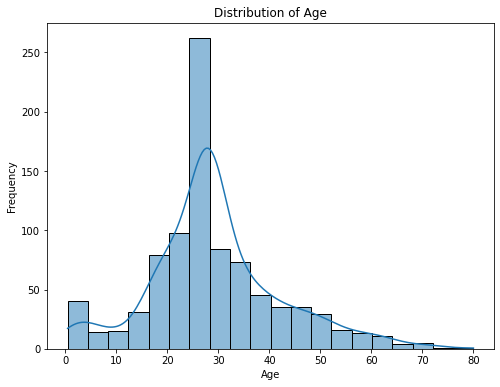

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

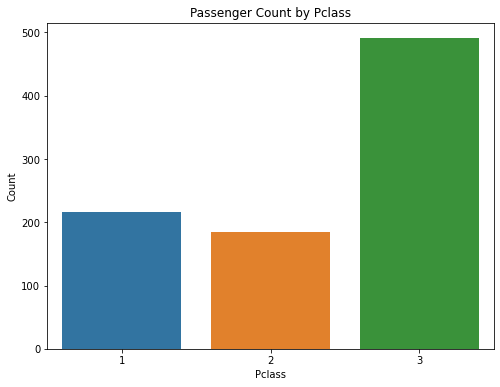

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass')
plt.title('Passenger Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

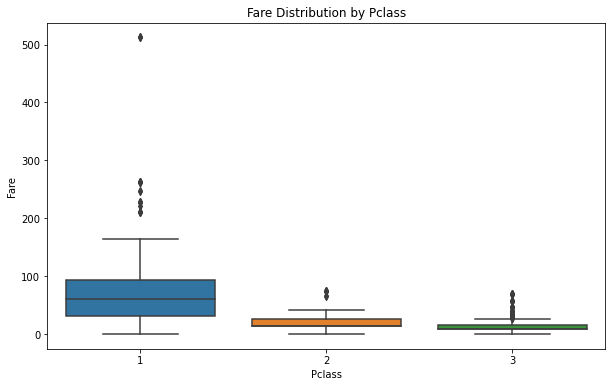

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

In [14]:
corr=df.corr()

<AxesSubplot:>

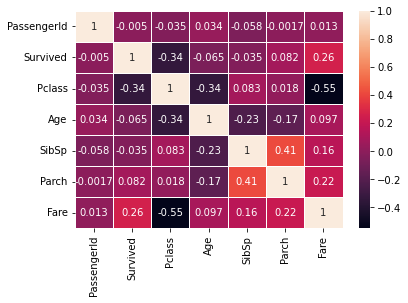

In [15]:
sns.heatmap(corr, annot=True, linewidths=0.5)

### Outlier Detection

<AxesSubplot:xlabel='Age'>

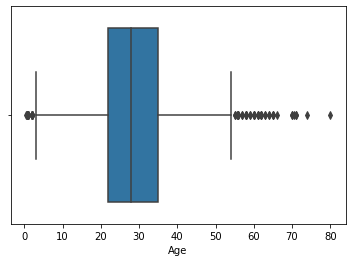

In [16]:
sns.boxplot(data=df, x='Age')

<AxesSubplot:xlabel='SibSp'>

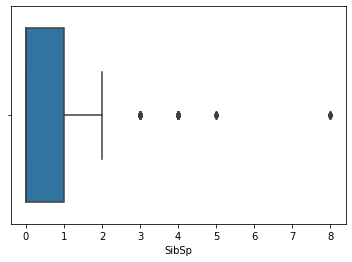

In [17]:
sns.boxplot(data=df, x='SibSp')

<AxesSubplot:xlabel='Fare'>

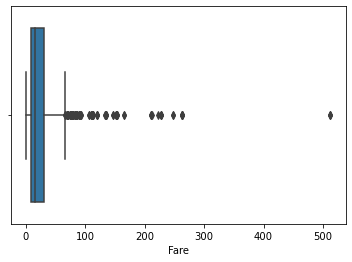

In [18]:
sns.boxplot(data=df, x='Fare')

### Outlier Removal


In [19]:
q1=q1=df.Fare.quantile(0.25)
q3=df.Fare.quantile(0.75)

In [20]:
IQR=q3-q1
upper_limit=q3+1.5*IQR
upper_limit

65.6344

In [21]:
df=df[df.Fare<upper_limit]

In [22]:
#sns.boxplot(data=df, x='Fare')

In [23]:
df.Fare.shape

(775,)

In [24]:
q1=q1=df.Age.quantile(0.25)
q3=df.Age.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [25]:
df=df[ (df['Age']<upper_limit ) | (df['Age']>lower_limit)]

In [26]:
df.Age.shape

(775,)

In [27]:
q1=q1=df.SibSp.quantile(0.25)
q3=df.SibSp.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [28]:
df=df[ (df['SibSp']<upper_limit ) | (df['SibSp']>lower_limit)]

In [29]:
df.SibSp.shape

(775,)

In [30]:
#sns.boxplot(data=df, x='SibSp')

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q


### Separarting Dependent and Independent variables

In [32]:
Duplicate_x = df.iloc[:,2:]
X=Duplicate_x.drop(columns=["Name","Ticket","Cabin"],axis=1)

In [33]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,28.0,0,0,8.4583,Q


In [34]:
y=df["Survived"]
y.head()

0    0
2    1
3    1
4    0
5    0
Name: Survived, dtype: int64

### Encoding

In [35]:
X_encoded = pd.get_dummies(X, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
X_encoded.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,1
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1
5,28.0,0,0,8.4583,0,1,1,1,0


### Feature Scaling.

In [36]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [37]:
X_Scaled=pd.DataFrame(ms.fit_transform(X_encoded),columns=X_encoded.columns)

In [38]:
 X_Scaled.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.271174,0.2,0.0,0.111538,0.0,1.0,1.0,0.0,1.0
1,0.321438,0.0,0.0,0.121923,0.0,1.0,0.0,0.0,1.0
2,0.434531,0.2,0.0,0.816923,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.0,0.0,0.123846,0.0,1.0,1.0,0.0,1.0
4,0.346569,0.0,0.0,0.130128,0.0,1.0,1.0,1.0,0.0


### Splitting Data into Train and Test

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size =0.2,random_state =0)

In [41]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(620, 9) (155, 9) (620,) (155,)
